# Distribution of the number of edges in the Voronoi's polygons of the Main Cluster

In this notebook we will show how to get the distribution of the number of edges in the Voronoi's polygons that appear in the main cluster of the neighborhood of the Quasiperiodic Lattice around an arbitrary point.

Let's load the files that will be used in this notebook.

In [1]:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")
include("voronoi.jl")
include("Algoritmo_Voronoi.jl")
include("Algoritmo_Cluster_Principal_Iterado.jl")
include("Algoritmo_Numero_Lados_Poligonos_Voronoi.jl")
include("Diccionario_Indices_Centroides_Voronoi.jl")

diccionario_Centroides_Indice_Voronoi (generic function with 1 method)

We will use the package "Plots" to visualize the polygons of the Neighborhood and the Voronoi's polygons. So, let's load it.

In [2]:
using Plots

### Information about the Quasiperiodic Lattice

Create the information of the star vectors required by the GDM algorithm, which determine the symmetry of the quasiperiodic lattice. Also, generate the array that contains the alpha constants and the array with the average distance between stripes.

In [3]:
NSides = 5; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

### Calculation of the number of edges

The algorithm is based in the structure of the Voronoi's Polygons. 

As we showed in the notebook of the folder "Main_Cluster's_Polygons_(Areas_Algorithm)", we will first get the centroids of the polygons that lives in the main cluster (quasiperiodic lattice).

Then, in the initial voronoi's structure (the one generated with all the centroids of the quasiperiodic lattice's polygons, including all the isolated polygons and the polygons of the minor clusters) we count the number of vertices of the Voronoi's polygons associated with the centroids of the Main Cluster. Since these polygons are closed polygons, the number of vertices equals the number of edges.

Finally we iterate this process a determinated number of times and get the statistical distribution of the number of edges of a given quasiperiodic lattice.

All this is done by the function "arreglo_Numero_Lados_Buenos_Poligonos". Let's see how to use it.

#### Note:
Be careful choosing the right value for the variable "Cluster_Iterations". 

If you choose a big number and you don't have enough polygons, the algorithm will send you an error, because you are "removing" more outer layers by the areas algorithm than the total number of layers you have.

If you choose a small number and you have a lot of polygons (so you have a lot of outer layers of isolated polygons and/or a lot of minor clusters), then you will not only check the number of edges (in the Voronoi's Lattice) of the polygons of the principal cluster (Quasiperiodic Lattice) and then your statistical result will not be correct.

I recommend using the notebook that is in the folder "Main_Cluster's_Polygons_(Areas_Discrimination)" and try your parameters with the algorithm used in the section *Iterated areas algorithm* until you will be sure that your parameters are right.

In [4]:
Iterations = 200; #Number of the iterations of the algorithm that calculates the number of edges.
Error_Margin = 3; #Margin of error in the integer numbers generated as the projection of the arbitrary point into the star vectors
SL = 1e7; #Size of a half side of the square in which the algorithm generate a random point inside it
Bounded_Area = 1.2; #The value for the area of the polygons that will be a discriminator value in the areas algorithm
Cluster_Iterations = 3; #Number of iterations of the areas algorithm (see "Main_Cluster's_Polygons_(Areas_Algorithm)" for further references) 

#Let's get an array with the number of edges of all the polygons considered and the coordinates of the vertices of the
#polygons that live in each of the main clusters generated.
#Each of the 
Edges_Numbers_Array, Vertices_Array = arreglo_Numero_Lados_Buenos_Poligonos(Iterations, Cluster_Iterations, Bounded_Area, Error_Margin, SL, Average_Distance_Stripes, Star_Vectors, Alphas_Array);

Se han realizado 1 iteraciones.
Se han realizado 2 iteraciones.
Se han realizado 3 iteraciones.
Se han realizado 4 iteraciones.
Se han realizado 5 iteraciones.
Se han realizado 6 iteraciones.
Se han realizado 7 iteraciones.
Se han realizado 8 iteraciones.
Se han realizado 9 iteraciones.
Se han realizado 10 iteraciones.
Se han realizado 11 iteraciones.
Se han realizado 12 iteraciones.
Se han realizado 13 iteraciones.
Se han realizado 14 iteraciones.
Se han realizado 15 iteraciones.
Se han realizado 16 iteraciones.
Se han realizado 17 iteraciones.
Se han realizado 18 iteraciones.
Se han realizado 19 iteraciones.
Se han realizado 20 iteraciones.
Se han realizado 21 iteraciones.
Se han realizado 22 iteraciones.
Se han realizado 23 iteraciones.
Se han realizado 24 iteraciones.
Se han realizado 25 iteraciones.
Se han realizado 26 iteraciones.
Se han realizado 27 iteraciones.
Se han realizado 28 iteraciones.
Se han realizado 29 iteraciones.
Se han realizado 30 iteraciones.
Se han realizado 31

The maximum number of edges is 7
The minimum number of edges is 4


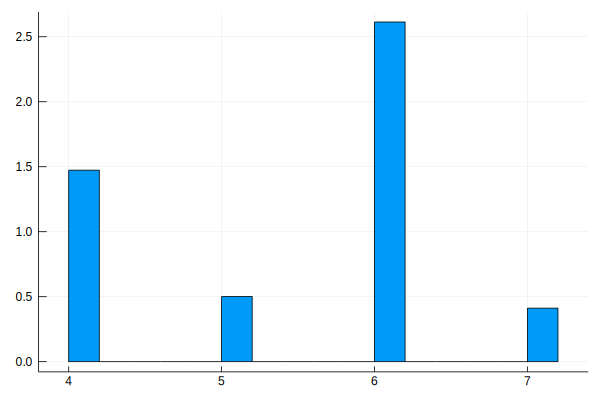

In [5]:
println("The maximum number of edges is $(maximum(Edges_Numbers_Array))")
println("The minimum number of edges is $(minimum(Edges_Numbers_Array))")
histogram(Edges_Numbers_Array, normalize = true, key = false)

In [6]:
println("The average number of edges of the system is $(sum(Edges_Numbers_Array)/length(Edges_Numbers_Array))")

The average number of edges of the system is 5.392756426690283


Let's visualize the Voronoi's polygons considered in the first main cluster

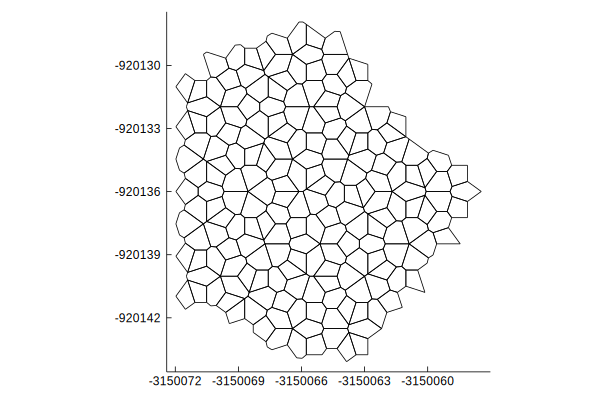

In [7]:
Number_Cluster = 1; #The number of cluster that we want to visualize. It must be an integer in [1, Iterations]

plot()
for i in Vertices_Array[Number_Cluster]
    for j in 1:length(i)
        if j+1 <= length(i)
            plot!([i[j][1], i[j+1][1]], [i[j][2], i[j+1][2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
        else
            plot!([i[j][1], i[1][1]], [i[j][2], i[1][2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
        end
    end
end
plot!()